<a href="https://colab.research.google.com/github/hernanmartinezrivero/machine_learning/blob/main/Ejercicio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analysis and Visualization**

**Ejercicio Nro. 01**

Exercise 1
Responder a la pregunta: ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?

Para ello:

-Seleccionar las columnas relevantes para analizar.

-Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 100000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.

-Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:

-Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.

-Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde mayoría es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.

-Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

-Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

**Importar librerias**

In [41]:
import io
import numpy
import pandas as pd
import seaborn

import matplotlib
import matplotlib.pyplot as plt

**Upload Dataset and Read .csv File**

In [16]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

**Exploración preliminar**
Analizamos la estructura del dataframe:

-cuantas filas y columnas tiene?

-Cuales son las etiquetas?

-Hay valores perdidos y datos basura?

-cuantas filas y columnas tiene?

In [17]:
df.shape # Analizar numero de filas y columnas

(5805, 43)

-Cuales son las etiquetas?

In [13]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

-Hay valores perdidos y datos basura?

In [18]:
df.isna()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,False,False
3,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,False,False
4,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
5801,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,True,True,True,True,False,False
5802,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
5803,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,True,True,True,False,False


-Se remueven las columnas innecesarias

In [19]:
df.drop(['¿Salir o seguir contestando?', '¿Salir o seguir contestando sobre las guardias?', '¿Salir o seguir contestando sobre estudios?'], axis=1, inplace=True)
df.head()


,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,"¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?",profile_studies_level,profile_studies_level_state,profile_career,Institución educativa,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,1,Maestría,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
3,Argentina,Chaco,Part-Time,Staff (planta permanente),190000.0,240000.0,NaN,NaN,No,No recibo bono,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer Cis
4,Argentina,Chaco,Full-Time,Tercerizado (trabajo a través de consultora o ...,250000.0,207000.0,NaN,NaN,No,No recibo bono,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


**Acceso a columnas y celdas particulares**

In [20]:
df['salary_monthly_NETO']

0        520000.0
1        520000.0
2        104000.0
3        240000.0
4        207000.0
          ...    
5800     275000.0
5801     470000.0
5802    1150000.0
5803     525000.0
5804     160000.0
Name: salary_monthly_NETO, Length: 5805, dtype: float64

Lista de columnas relevantes para el análisis y busqueda del valor máximo dentro la columna

In [21]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']
highest_salary = df['salary_monthly_NETO'].max()
print('El valor de salario neto más alto es', highest_salary)

El valor de salario neto más alto es 45000000.0


Indice de fila con el mayor valor

In [22]:
df['salary_monthly_NETO'].idxmax()

5454

Para ver cual es el programa que corresponde a este pago

In [25]:
highest_salary_languages = df['tools_programming_languages'].loc[5454]
print('Los programas que conoce la persona de salario mas alto son: ', highest_salary_languages)

Los programas que conoce la persona de salario mas alto son:  Bash/Shell, Go, Python, SQL


Para ver una fila en particular

In [26]:
df.loc[5454]

work_country                                                                                                                    Argentina
work_province                                                                                                                    Santa Fe
work_dedication                                                                                                                 Full-Time
work_contract_type                                                                                                             Contractor
salary_monthly_BRUTO                                                                                                           45000000.0
salary_monthly_NETO                                                                                                            45000000.0
salary_in_usd                                                                                            Cobro todo el salario en dólares
salary_last_dollar_value          

Para visualizar las menciones de programas que estan separados por comas, generamos filas por programa

In [31]:
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')

  # Split string into a list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '') for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
  .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})

df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,bash/shell,"Bash/Shell, Python",520000.0,"[bash/shell, python]"
0,python,"Bash/Shell, Python",520000.0,"[bash/shell, python]"
1,bash/shell,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,"[bash/shell, css, html, javascript, php, sql, ..."
1,css,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,"[bash/shell, css, html, javascript, php, sql, ..."
1,html,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,"[bash/shell, css, html, javascript, php, sql, ..."


Calculamos ahora la frecuencia de aparición de cada programa

In [50]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:55]

,frequency,count
0,sql,2508
1,javascript,2282
2,html,1643
3,python,1623
4,css,1109
5,java,1075
6,typescript,1061
7,bash/shell,898
8,.net,688
9,php,668


Al hacer una ampliación del listado hasta la posicion 120, observamos codigos de cantidad 1 que corresponden a errores de carga, entonces hacemos un listado de codigos unicos para ver que aparece

In [33]:
language_count.frequency.unique()

array(['sql', 'javascript', 'html', 'python', 'css', 'java', 'typescript',
       'bash/shell', '.net', 'php', 'c#', 'go', 'vba', 'c++', 'kotlin',
       'c', 'groovy', 'r', 'ruby', 'arduino', 'scala', 'cobol', 'swift',
       'abap', 'dart', 'perl', 'rust', 'powershell', 'solidity', 'delphi',
       'objective-c', 'smalltalk', 'apex', 'elixir', 'matlab', 'genexus',
       '', 'terraform', 'assembler', 'no', 'de', 'dax', 'ansible',
       'oracle', 'clojure', 'pl/sql', 'salesforce', 'visual', 'bash',
       'erlang', 'rpg', 'y', 'ninguna', 'foxpro', 'power', 'plsql', 'xml',
       'sas', 'al', 'react', 'mi', '.', 'x++', 'vb6', 'stata', 'powerbi',
       'bi', 'utilizamos', 'actionscript', 'rpgle', 'ninguno', 'm',
       'engine', 'progress', 'mulesoft', 'hcl', 'cli', 'developer',
       'solo', 'figma', '-', 'lenguajes', 'asp', 'aplica', 'esql', 'pl',
       'ibm', 'edwards', 'kusto', 'programo', 'jd', 'lua', 'a', 'gosu',
       'puesto', 'mikrotik', 'vlocity', 'pascal', 'comunicacione

**Teniendo en cuenta que nuestro dataset esta contaminado, vamos a buscar los lenguajes de programación que más se repiten en base a un listado base que elejimos en base a informacion disponible.**

```
# This is formatted as code
```



Número de entradas que coinciden con los lenguajes más utilizados: 518


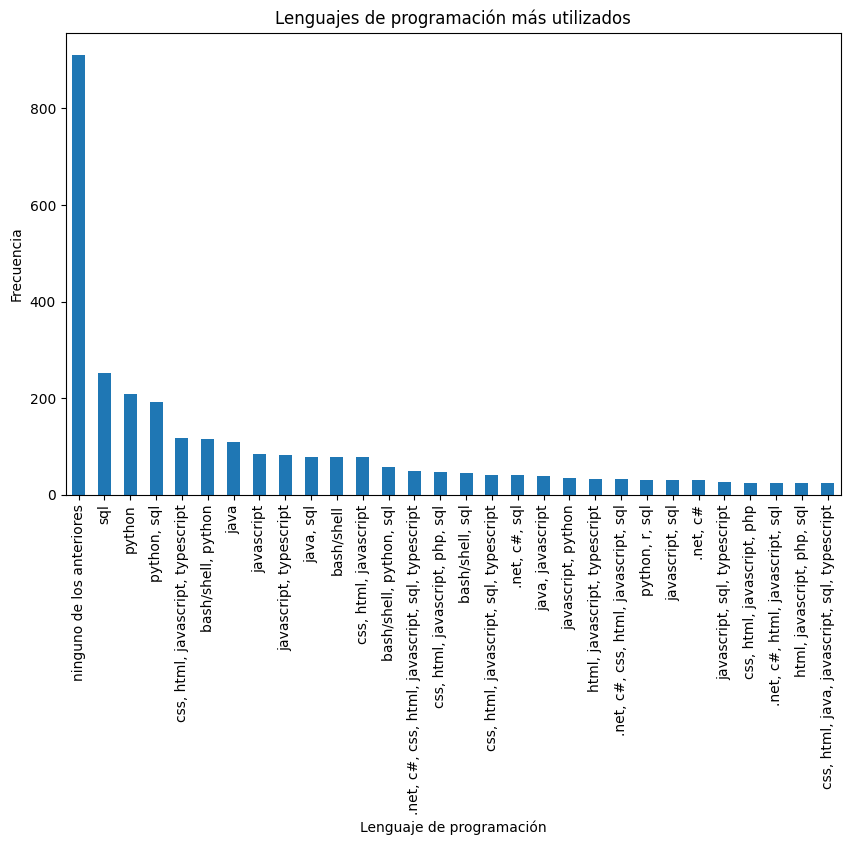

In [51]:
def contar_lenguajes(df, columna):
    # Lista de los lenguajes de programación más utilizados
    lenguajes = [
        "javascript", "python", "java", "c#", "php", "typescript", "c++",
        "ruby", "swift", "kotlin", "go", "rust", "r", "scala", "dart"
    ]

    # Convierte los datos de la columna a minúsculas y cuenta las coincidencias con la lista
    conteo = df[columna].str.lower().isin(lenguajes).sum()

    return conteo

# Llamada a la función
resultado = contar_lenguajes(df, 'tools_programming_languages')
print(f'Número de entradas que coinciden con los lenguajes más utilizados: {resultado}')
print("============================================================================================")

# Graficar las coincidencias
plt.figure(figsize=(10, 6))
df['tools_programming_languages'].str.lower().value_counts().head(30).plot(kind='bar')
plt.title('Lenguajes de programación más utilizados')
plt.xlabel('Lenguaje de programación')
plt.ylabel('Frecuencia')
plt.show()

Vamos a graficar la distribución  

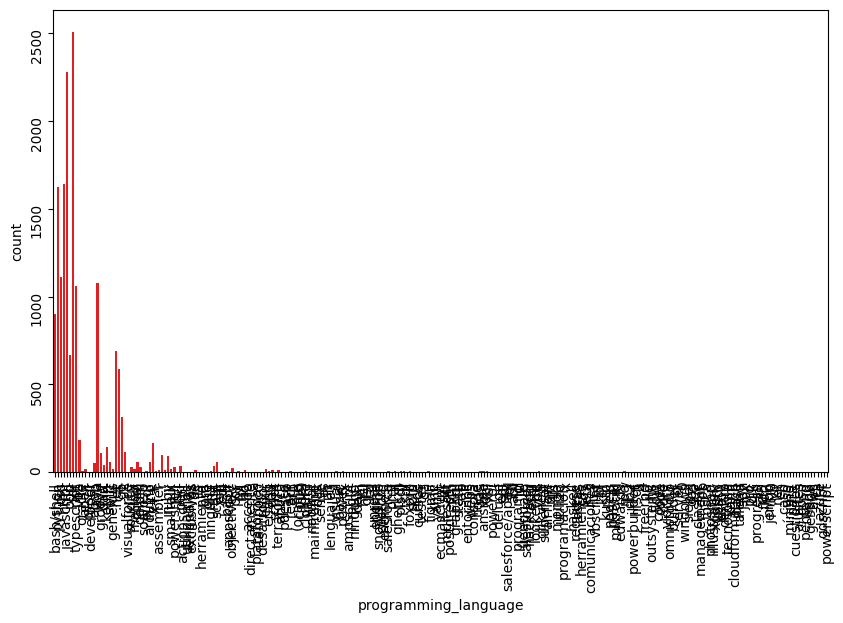

In [47]:
plt.figure(figsize=(10,6))
seaborn.countplot(x=df_lang.programming_language, color ='red' )
plt.tick_params(labelrotation=90)